In [1]:
%matplotlib inline

In [2]:
"""Systematic variations of HESE 7yr sample"""
from copy import deepcopy
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./paper.mplstyle')

import matplotlib2tikz

/home/smandalia/.local/lib/python2.7/site-packages/matplotlib2tikz/__init__.py:31: UserWarning: matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.
  warnings.warn("matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.")


In [3]:
import GolemFitPy as gf

# setup fitter
datapaths = gf.DataPaths()
npp = gf.NewPhysicsParams()

sparams = gf.SteeringParams(gf.sampleTag.MagicTau)
sparams.quiet = False
sparams.fastmode = False
sparams.minFitEnergy = 6E4 # GeV
sparams.maxFitEnergy = 1E7 # GeV
sparams.load_data_from_text_file = False
sparams.use_legacy_selfveto_calculation = False
sparams.do_HESE_reshuffle=False

FITTER = gf.GolemFit(datapaths, sparams, npp)

/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: to-Python converter for std::vector<golemfit::UnfoldingSegment, std::allocator<golemfit::UnfoldingSegment> > already registered; second conversion method ignored.
  """Entry point for launching an IPython kernel.
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: to-Python converter for std::vector<golemfit::AstrophysicalNeutrinoModel, std::allocator<golemfit::AstrophysicalNeutrinoModel> > already registered; second conversion method ignored.
  """Entry point for launching an IPython kernel.
/cvmfs/icecube.opensciencegrid.org/py2-v3/RHEL_7_x86_64/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: to-Python converter for nusquids::marray<double, 3u, std::allocator<double> > already registered; second conversion method ignored.
  """Entry point for launching an IPython kerne

In [4]:
fitparams = gf.FitParameters(gf.sampleTag.MagicTau)
print fitparams.anisotropyScale,
print fitparams.astroDeltaGamma,
print fitparams.astroDeltaGammaSec,
print fitparams.astroFlavorAngle1,
print fitparams.astroFlavorAngle2,
print fitparams.astroNorm,
print fitparams.astroNormSec,
print fitparams.astroParticleBalance,
print fitparams.convNorm,
print fitparams.CRDeltaGamma,
print fitparams.cutoffEnergy,
print fitparams.darkNorm,
print fitparams.domEfficiency,
print fitparams.holeiceForward,
print fitparams.muonNorm,
print fitparams.NeutrinoAntineutrinoRatio,
print fitparams.piKRatio,
print fitparams.promptNorm,
print fitparams.timeSplit,
print fitparams.zenithCorrection

nuisance = ('convNorm', 'promptNorm', 'muonNorm', 'astroNorm', 'astroDeltaGamma')
for n in nuisance:
    print n, '=', fitparams.__getattribute__(n)

1.0 2.5 2.0 0.444444447756 0.0 8.0 7.0 1.0 1.0 0.0 10.0 9.99999968266e-21 0.990000009537 0.0 1.0 1.0 1.0 1.0 56400.0 0.0
convNorm = 1.0
promptNorm = 1.0
muonNorm = 1.0
astroNorm = 8.0
astroDeltaGamma = 2.5


In [5]:
binning = FITTER.GetEnergyBinsMC()
print np.diff(np.log10(binning))
print np.diff(np.log10(np.logspace(np.log10(6E4), np.log10(1E7), 21)))

livetime = FITTER.GetLivetime()/(3600.*24)
print livetime

[0.111      0.111      0.111      0.111      0.111      0.111
 0.111      0.111      0.111      0.111      0.111      0.111
 0.111      0.111      0.111      0.111      0.111      0.111
 0.111      0.111      0.00184875]
[0.11109244 0.11109244 0.11109244 0.11109244 0.11109244 0.11109244
 0.11109244 0.11109244 0.11109244 0.11109244 0.11109244 0.11109244
 0.11109244 0.11109244 0.11109244 0.11109244 0.11109244 0.11109244
 0.11109244 0.11109244]
2635.5112


In [6]:
def parse_exp(x):
    h = np.sum(x, axis=(0,1,2,3))
    return np.concatenate([[h[0]], h])

In [7]:
null_exp = parse_exp(FITTER.GetExpectation(fitparams))

d = fitparams.convNorm
fitparams.convNorm = 1.4
norm_conv_p = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.convNorm = 0.6
norm_conv_n = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.convNorm = d

d = fitparams.promptNorm
fitparams.promptNorm = 2.4
prompt_p = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.promptNorm = 0
prompt_n = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.promptNorm = d

d = fitparams.muonNorm
fitparams.muonNorm = 1.5
muon_p = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.muonNorm = 0.5
muon_n = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.muonNorm = d

d = fitparams.astroNorm
fitparams.astroNorm = 12
astro_p = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.astroNorm = 4
astro_n = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.astroNorm = d

d = fitparams.astroDeltaGamma
fitparams.astroDeltaGamma = 3
dastro_index_p = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.astroDeltaGamma = 2
dastro_index_n = parse_exp(FITTER.GetExpectation(fitparams))
fitparams.astroDeltaGamma = d

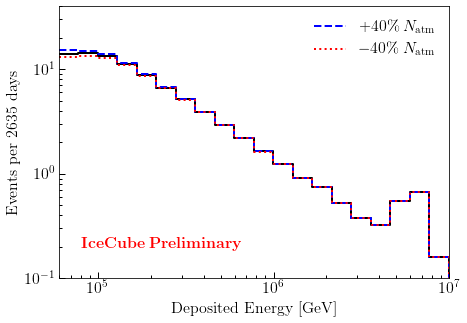

In [8]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E-1, 40)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Deposited Energy [GeV]', fontsize=fontsize)
ax.set_ylabel(r'Events per 2635 days', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, norm_conv_p, drawstyle='steps-pre', label=r'$+40\%\:N_{\rm{atm}}$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, norm_conv_n, drawstyle='steps-pre', label=r'$-40\%\:N_{\rm{atm}}$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

ax.text(
    8E4, 0.2, r'${\rm\bf IceCube\:Preliminary}$', fontsize=fontsize, color='r'
)

matplotlib2tikz.save("plots/tex/syst_convnorm.tex")

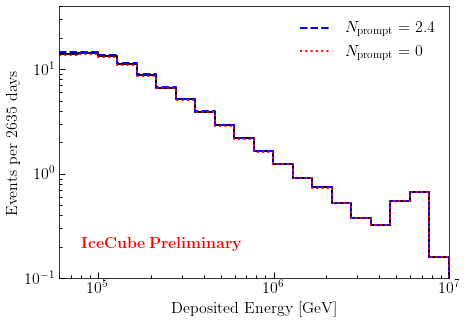

In [9]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E-1, 40)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Deposited Energy [GeV]', fontsize=fontsize)
ax.set_ylabel(r'Events per 2635 days', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, prompt_p, drawstyle='steps-pre', label=r'$N_{\rm{prompt}}=2.4$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, prompt_n, drawstyle='steps-pre', label=r'$N_{\rm{prompt}}=0$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

ax.text(
    8E4, 0.2, r'${\rm\bf IceCube\:Preliminary}$', fontsize=fontsize, color='r'
)

matplotlib2tikz.save("plots/tex/syst_prompt.tex")

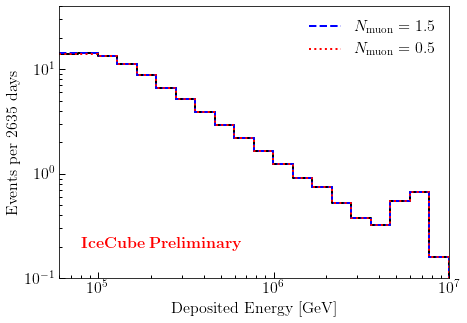

In [10]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E-1, 40)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Deposited Energy [GeV]', fontsize=fontsize)
ax.set_ylabel(r'Events per 2635 days', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, muon_p, drawstyle='steps-pre', label=r'$N_{\rm{muon}}=1.5$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, muon_n, drawstyle='steps-pre', label=r'$N_{\rm{muon}}=0.5$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

ax.text(
    8E4, 0.2, r'${\rm\bf IceCube\:Preliminary}$', fontsize=fontsize, color='r'
)

matplotlib2tikz.save("plots/tex/syst_muon.tex")

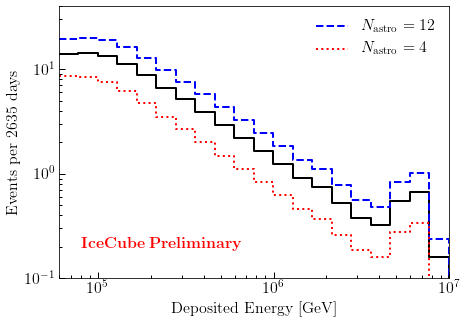

In [11]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E-1, 40)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Deposited Energy [GeV]', fontsize=fontsize)
ax.set_ylabel(r'Events per 2635 days', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, astro_p, drawstyle='steps-pre', label=r'$N_{\rm{astro}}=12$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, astro_n, drawstyle='steps-pre', label=r'$N_{\rm{astro}}=4$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

ax.text(
    8E4, 0.2, r'${\rm\bf IceCube\:Preliminary}$', fontsize=fontsize, color='r'
)

matplotlib2tikz.save("plots/tex/syst_astro.tex")

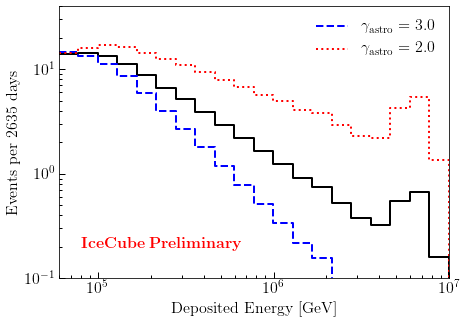

In [12]:
fontsize = 16

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

ax.set_xlim(binning[0], binning[-1])
ax.set_ylim(1E-1, 40)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'Deposited Energy [GeV]', fontsize=fontsize)
ax.set_ylabel(r'Events per 2635 days', fontsize=fontsize)

ax.tick_params(axis='x', labelsize=fontsize, which='both', direction='in')
ax.tick_params(axis='y', labelsize=fontsize, which='both', direction='in')

ax.step(
    binning, null_exp, drawstyle='steps-pre',
    linewidth=2, linestyle='-', color='black'
)

ax.step(
    binning, dastro_index_p, drawstyle='steps-pre', label=r'$\gamma_{\rm{astro}}=3.0$',
    linewidth=2, linestyle='--', color='blue'
)
ax.step(
    binning, dastro_index_n, drawstyle='steps-pre', label=r'$\gamma_{\rm{astro}}=2.0$',
    linewidth=2, linestyle=':', color='red'
)

ax.legend(loc='upper right', prop={'size': fontsize})#, bbox_to_anchor=(0.96, 0.96), markerfirst=False)

ax.text(
    8E4, 0.2, r'${\rm\bf IceCube\:Preliminary}$', fontsize=fontsize, color='r'
)

matplotlib2tikz.save("plots/tex/syst_astro_index.tex")